# Mother Tongues of Canada, by Knowledge of the official languages
by Grace Cowderoy

## Abstract
Canada is a nation with two official languages: English and French. According to the 2021 Statistics Canada census, 98.2% of Canadian residents speak at least one of the official languages. However, only 74.5% of the population consider one of the official languages as their first language (L1), also called their mother tongue - the language first learnt in childhood. For the other 25.6% of people, their mother tongue is a non-official language. 

The dataset Table 98-10-0175-01  Mother tongue by knowledge of official languages: Canada, provinces and territories, census metropolitan areas and census agglomerations with parts provides data from the 2021 Statistics Canada census on the respondent’s mother tongue, age at the time of census, gender, knowledge of the two official languages, and their location within Canada. 

This study proposes to weigh the factors that influence the knowledge of each official language. Research questions include: Does living in a particular area influence a speaker of a non-official language towards English or French? Does any single mother tongue influence a speaker towards English or French? What influence does the age of the speaker have on knowledge of the official languages? 

Classification techniques will be used to identify groups that may be more likely to speak each of the official languages, both the official languages, and those more likely to speak neither official language. As the dataset is imbalanced due to more speakers of English than French, balancing techniques such as oversampling and undersampling will be used. 


## Introduction
In Canada, the term ‘bilingual’ refers to speakers of both official languages, as opposed to the more general term where a speaker knows two different languages. The distribution of these bilingual speakers is not uniform across Canada, and neither is the distribution of speakers of non-official languages. 

The population of Canada has a variety of both indigenous and non-indigenous languages as their mother tongue. Canada is home to 81 living indigenous languages (Ethnologue), with many immigrants bringing their own native language to Canada. 

There are approximately 7,000 languages currently in use in the world (Ethnologue). These languages can be structured into families. English belongs to the Germanic branch of the Indo-European family, while French belongs to the Romance branch of the same family. It has been established that generally it is easier to acquire a second language (L2) when it is closely related to the learner’s first language (L1) (Gampe, A 2021). As such, within Canada, it may reasonably be expected that those speakers with an L1 more closely related to French would have greater knowledge of French. Another factor may be the location of the individual within Canada - policies in different provinces may promote one official language over another. The age of the individual can affect their language skills, as it is generally easier to acquire a second language in childhood compared to adulthood. Further, language policy in Canada has changed over time and varies between the provinces and territories, which suggests that age may be a factor in knowledge of the official languages depending on the policies in place over time. 

This is an investigation of the dataset Statistics Canada. Table 98-10-0175-01  Mother tongue by knowledge of official languages: Canada, provinces and territories, census metropolitan areas and census agglomerations with parts, https://doi.org/10.25318/9810017501-eng 

The dataset was released 2022-08-17 and comes from the 2021 Census of Population of Canada. Due to the recent release of the dataset, it does not yet appear to have been cited on Web of Science (As of 2023-10-07)

The dataset has multiple dimensions, including age, gender, geographic location, mother tongue of respondent, respondent's knowledge of the official languages (French and English). These dimensions include aggregates as individual records, e.g. Canada as a record, Ontario, Toronto. Part of the data cleaning will involve converting these aggregations into their tree structures. 

Importing the required libraries, bringing in the dataset motherTongues Table 98-10-0175-01 and doing the initial exploratory data analysis. 

In [45]:
#Data Handling and Modeling Tools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport
from ydata_profiling.model.typeset import ProfilingTypeSet
from bigtree import dataframe_to_tree_by_relation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split, KFold,cross_val_score,cross_validate
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, brier_score_loss, matthews_corrcoef
from skmultilearn.model_selection import iterative_train_test_split
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
#Benchmarking Tools
import pyperformance
import pyperf
import memory_profiler
from scipy.stats import ttest_ind

In [47]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [48]:
motherTongues_filepath = '/home/grace/Documents/CapstoneProject/MotherTongues/98100175.csv'
motherTongues_data = pd.read_csv(motherTongues_filepath)
motherTongues_data.describe()

,REF_DATE,Knowledge of official languages (5):Total - Knowledge of official languages[1],Symbol,Knowledge of official languages (5):English only[2],Symbol.1,Knowledge of official languages (5):French only[3],Symbol.2,Knowledge of official languages (5):English and French[4],Symbol.3,Knowledge of official languages (5):Neither English nor French[5],Symbol.4
count,2591730.0,2.591730e+06,0.0,2.591730e+06,0.0,2.591730e+06,0.0,2.591730e+06,0.0,2.591730e+06,0.0
mean,2021.0,1.067793e+03,NaN,7.499710e+02,NaN,1.010610e+02,NaN,1.881355e+02,NaN,2.855237e+01,NaN
std,0.0,6.512709e+04,NaN,4.737592e+04,NaN,1.002769e+04,NaN,1.314044e+04,NaN,1.603253e+03,NaN
min,2021.0,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN
25%,2021.0,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN
50%,2021.0,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN
75%,2021.0,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN
max,2021.0,3.662096e+07,NaN,2.526166e+07,NaN,4.087895e+06,NaN,6.581680e+06,NaN,6.897250e+05,NaN


In [49]:
print(len(motherTongues_data))
list(motherTongues_data.columns)

2591730


['REF_DATE',
 'GEO',
 'DGUID',
 'Gender (3)',
 'Age (15A)',
 'Mother tongue (331)',
 'Coordinate',
 'Knowledge of official languages (5):Total - Knowledge of official languages[1]',
 'Symbol',
 'Knowledge of official languages (5):English only[2]',
 'Symbol.1',
 'Knowledge of official languages (5):French only[3]',
 'Symbol.2',
 'Knowledge of official languages (5):English and French[4]',
 'Symbol.3',
 'Knowledge of official languages (5):Neither English nor French[5]',
 'Symbol.4']

In [50]:
motherTongues_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2591730 entries, 0 to 2591729
Data columns (total 17 columns):
 #   Column                                                                          Dtype  
---  ------                                                                          -----  
 0   REF_DATE                                                                        int64  
 1   GEO                                                                             object 
 2   DGUID                                                                           object 
 3   Gender (3)                                                                      object 
 4   Age (15A)                                                                       object 
 5   Mother tongue (331)                                                             object 
 6   Coordinate                                                                      object 
 7   Knowledge of official languages (5):Total - K

In [51]:
genderList = motherTongues_data["Gender (3)"].unique()


In [52]:
profile = ProfileReport(motherTongues_data, title = "Profiling Report", explorative=True)
##profile

In [53]:
#profile.to_file('/home/grace/Documents/CapstoneProject/MotherTongues-Canada/EDA.html')


The YData Profiling identified a number of empty features and some uniform features. These will be handled in the next steps and YData Profile will be run again. 

In [54]:
motherTongues_data.isnull().sum()

REF_DATE                                                                                0
GEO                                                                                     0
DGUID                                                                                   0
Gender (3)                                                                              0
Age (15A)                                                                               0
Mother tongue (331)                                                                     0
Coordinate                                                                              0
Knowledge of official languages (5):Total - Knowledge of official languages[1]          0
Symbol                                                                            2591730
Knowledge of official languages (5):English only[2]                                     0
Symbol.1                                                                          2591730
Knowledge 

In [55]:
df = motherTongues_data[[c for c in motherTongues_data.columns if 'Symbol' not in c]]
list(df.columns)

['REF_DATE',
 'GEO',
 'DGUID',
 'Gender (3)',
 'Age (15A)',
 'Mother tongue (331)',
 'Coordinate',
 'Knowledge of official languages (5):Total - Knowledge of official languages[1]',
 'Knowledge of official languages (5):English only[2]',
 'Knowledge of official languages (5):French only[3]',
 'Knowledge of official languages (5):English and French[4]',
 'Knowledge of official languages (5):Neither English nor French[5]']

In [56]:
df=df.loc[:,df.columns != 'REF_DATE']
df=df.loc[:,df.columns != 'DGUID']

In [57]:
df.isnull().sum()

GEO                                                                               0
Gender (3)                                                                        0
Age (15A)                                                                         0
Mother tongue (331)                                                               0
Coordinate                                                                        0
Knowledge of official languages (5):Total - Knowledge of official languages[1]    0
Knowledge of official languages (5):English only[2]                               0
Knowledge of official languages (5):French only[3]                                0
Knowledge of official languages (5):English and French[4]                         0
Knowledge of official languages (5):Neither English nor French[5]                 0
dtype: int64

In [58]:
profileDF = ProfileReport(df, title = "Profiling Report (Reduced)", explorative=True)
#profileDF.to_file('/home/grace/Documents/CapstoneProject/MotherTongues-Canada/EDA-reduced.html')

In [59]:
list(df.columns)

['GEO',
 'Gender (3)',
 'Age (15A)',
 'Mother tongue (331)',
 'Coordinate',
 'Knowledge of official languages (5):Total - Knowledge of official languages[1]',
 'Knowledge of official languages (5):English only[2]',
 'Knowledge of official languages (5):French only[3]',
 'Knowledge of official languages (5):English and French[4]',
 'Knowledge of official languages (5):Neither English nor French[5]']

The dataset includes aggregations as individual rows. The features 'Knowledge of Official languages' for Single responses (row 1, coordinate 1.1.1.2) is the sum of row 2 and row 5 - Official languages and Non-official languages respectively. Part of the data cleaning will require separating out these aggregations. 

Upon reviewing the metadata - each Geographical area has a unique member ID and is listed with its parent Member ID. 
E.g. Canada has ID 1; Nova Scotia has ID 10 and parent ID 1; and Halifax has ID 12 and parent member 10 (Nova Scotia)

Similarly for age - Total Age has ID 1; 25 to 64 years has ID 9 and parent ID 1; 25 to 34 years has ID 10 and parent ID 9. 

Mother tongues, Gender, knowledge of official languages have similar encoding available in the metadata. 

The next sections will review the tree hierarchies for the independent variables and flatten them to reduce dimensionality. 

In [60]:
df.head(n=8)

,GEO,Gender (3),Age (15A),Mother tongue (331),Coordinate,Knowledge of official languages (5):Total - Knowledge of official languages[1],Knowledge of official languages (5):English only[2],Knowledge of official languages (5):French only[3],Knowledge of official languages (5):English and French[4],Knowledge of official languages (5):Neither English nor French[5]
0,Canada,Total - Gender,Total - Age,Total - Mother tongue,1.1.1.1,36620955,25261655,4087895,6581680,689725
1,Canada,Total - Gender,Total - Age,Single responses,1.1.1.2,35145265,24306165,4029960,6130560,678580
2,Canada,Total - Gender,Total - Age,Official languages,1.1.1.3,27296445,18325325,3734010,5226490,10620
3,Canada,Total - Gender,Total - Age,English,1.1.1.4,20107200,18285580,5990,1806605,9025
4,Canada,Total - Gender,Total - Age,French,1.1.1.5,7189245,39740,3728020,3419880,1595
5,Canada,Total - Gender,Total - Age,Non-official languages,1.1.1.6,7848820,5980845,295950,904065,667955
6,Canada,Total - Gender,Total - Age,Indigenous languages,1.1.1.7,148895,123580,10995,8785,5535
7,Canada,Total - Gender,Total - Age,Algonquian languages,1.1.1.8,97125,79020,10730,5625,1760


The following section brings in the metadata files as individual dataframes. The metadata provides the id of the element and the id of the parent element. Any element that is listed with an ID that is not in the Parent ID column thus is not an aggregation. Each data element is labelled as being a parent or not. This equates to True whenever it appears in the Parent ID list and False when it does not. This will allow us to consider those values that are not aggregations. 

In [61]:
motherTonguesMeta_filepath = '/home/grace/Documents/CapstoneProject/MotherTongues-Canada/MetaData_Geography.csv'
geoData = pd.read_csv(motherTonguesMeta_filepath)

#geoData.head()
geoReduced = geoData[['Member Name','Member ID','Parent Member ID']]

isParent = geoReduced['Member ID'].isin(geoReduced['Parent Member ID'])

geoReduced['Is Parent Loc'] = isParent

#geoReduced.tail()
censusMA = geoReduced.loc[geoReduced['Is Parent Loc']== False]

censusMA.head()

/tmp/ipykernel_6067/4052823195.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geoReduced['Is Parent Loc'] = isParent


,Member Name,Member ID,Parent Member ID,Is Parent Loc
2,"Corner Brook (CA), N.L.",3,2.0,False
3,"Gander (CA), N.L.",4,2.0,False
4,"Grand Falls-Windsor (CA), N.L.",5,2.0,False
5,"St. John's (CMA), N.L.",6,2.0,False
7,"Charlottetown (CA), P.E.I.",8,7.0,False


This following section shows the hierarchical structure of the GEO attribute - the geographical location within Canada. Note that CMA refers to Census Metropolitan Area while CA refers to Census Agglomeration. https://www12.statcan.gc.ca/census-recensement/2021/ref/dict/az/Definition-eng.cfm?ID=geo009 

In [62]:
geoTree = dataframe_to_tree_by_relation(geoReduced, 'Member ID','Parent Member ID')
geoTree.show(attr_list = ['Member Name'])


1 [Member Name=Canada]
├── 2 [Member Name=Newfoundland and Labrador]
│   ├── 3 [Member Name=Corner Brook (CA), N.L.]
│   ├── 4 [Member Name=Gander (CA), N.L.]
│   ├── 5 [Member Name=Grand Falls-Windsor (CA), N.L.]
│   └── 6 [Member Name=St. John's (CMA), N.L.]
├── 7 [Member Name=Prince Edward Island]
│   ├── 8 [Member Name=Charlottetown (CA), P.E.I.]
│   └── 9 [Member Name=Summerside (CA), P.E.I.]
├── 10 [Member Name=Nova Scotia]
│   ├── 11 [Member Name=Cape Breton (CA), N.S.]
│   ├── 12 [Member Name=Halifax (CMA), N.S.]
│   ├── 13 [Member Name=Kentville (CA), N.S.]
│   ├── 14 [Member Name=New Glasgow (CA), N.S.]
│   └── 15 [Member Name=Truro (CA), N.S.]
├── 16 [Member Name=New Brunswick]
│   ├── 17 [Member Name=Bathurst (CA), N.B.]
│   ├── 18 [Member Name=Campbellton (CA), N.B./Que.]
│   │   ├── 19 [Member Name=Campbellton (New Brunswick part) (CA), N.B.]
│   │   └── 20 [Member Name=Campbellton (Quebec part) (CA), Que.]
│   ├── 21 [Member Name=Edmundston (CA), N.B.]
│   ├── 22 [Member

In [63]:
motherTonguesMeta_filepath = '/home/grace/Documents/CapstoneProject/MotherTongues-Canada/MetaData_MotherTongue.csv'
motherTongueData = pd.read_csv(motherTonguesMeta_filepath)

motherTongueData.head()
motherTongueData = motherTongueData[['Member Name','Member ID','Parent Member ID']]

isLanguage = motherTongueData['Member ID'].isin(motherTongueData['Parent Member ID'])

motherTongueData['Is Parent Lang'] = isLanguage
motherTongueData.tail(8)

,Member Name,Member ID,Parent Member ID,Is Parent Lang
323,Hungarian,324,321.0,False
324,"Other languages, n.i.e.",325,98.0,False
325,Multiple responses,326,1.0,True
326,English and French,327,326.0,False
327,English and non-official language(s),328,326.0,False
328,French and non-official language(s),329,326.0,False
329,"English, French and non-official language(s)",330,326.0,False
330,Multiple non-official languages,331,326.0,False


In [64]:
motherTongueTree = dataframe_to_tree_by_relation(motherTongueData,'Member ID','Parent Member ID')
motherTongueTree.show(attr_list = ['Member Name'])

1 [Member Name=Total - Mother tongue]
├── 2 [Member Name=Single responses]
│   ├── 3 [Member Name=Official languages]
│   │   ├── 4 [Member Name=English]
│   │   └── 5 [Member Name=French]
│   └── 6 [Member Name=Non-official languages]
│       ├── 7 [Member Name=Indigenous languages]
│       │   ├── 8 [Member Name=Algonquian languages]
│       │   │   ├── 9 [Member Name=Blackfoot]
│       │   │   ├── 10 [Member Name=Cree-Innu languages]
│       │   │   │   ├── 11 [Member Name=Atikamekw]
│       │   │   │   ├── 12 [Member Name=Cree languages]
│       │   │   │   │   ├── 13 [Member Name=Ililimowin (Moose Cree)]
│       │   │   │   │   ├── 14 [Member Name=Inu Ayimun (Southern East Cree)]
│       │   │   │   │   ├── 15 [Member Name=Iyiyiw-Ayimiwin (Northern East Cree)]
│       │   │   │   │   ├── 16 [Member Name=Nehinawewin (Swampy Cree)]
│       │   │   │   │   ├── 17 [Member Name=Nehiyawewin (Plains Cree)]
│       │   │   │   │   ├── 18 [Member Name=Nihithawiwin (Woods Cree)]
│       │  

In [65]:
#Excluding Aggregations; French; English; Multiple Mother Tongues. 
motherTongueLangs = motherTongueData.loc[(motherTongueData['Is Parent Lang']== False) & (motherTongueData['Parent Member ID'] != 326)& (motherTongueData['Member ID'] != 4)& (motherTongueData['Member ID'] != 5)]
motherTongueLangs.head(10)

,Member Name,Member ID,Parent Member ID,Is Parent Lang
8,Blackfoot,9,8.0,False
10,Atikamekw,11,10.0,False
12,Ililimowin (Moose Cree),13,12.0,False
13,Inu Ayimun (Southern East Cree),14,12.0,False
14,Iyiyiw-Ayimiwin (Northern East Cree),15,12.0,False
15,Nehinawewin (Swampy Cree),16,12.0,False
16,Nehiyawewin (Plains Cree),17,12.0,False
17,Nihithawiwin (Woods Cree),18,12.0,False
18,"Cree, n.o.s.",19,12.0,False
19,Innu (Montagnais),20,10.0,False


In [66]:
motherTonguesMeta_filepath = '/home/grace/Documents/CapstoneProject/MotherTongues-Canada/MetaData_Age.csv'
motherTongueAge = pd.read_csv(motherTonguesMeta_filepath)
motherTongueAge = motherTongueAge[['Member Name','Member ID','Parent Member ID']]

isAgeGroup = motherTongueAge['Member ID'].isin(motherTongueAge['Parent Member ID'])
motherTongueAge['Is Parent Age']=isAgeGroup
#motherTongueAge.head()

In [67]:
motherTonguesMeta_filepath = '/home/grace/Documents/CapstoneProject/MotherTongues-Canada/MetaData_Gender.csv'
motherTongueGender = pd.read_csv(motherTonguesMeta_filepath)
motherTongueGender = motherTongueGender[['Member Name','Member ID','Parent Member ID']]

isGenderGroup = motherTongueGender['Member ID'].isin(motherTongueGender['Parent Member ID'])
motherTongueGender['Is Parent Gender']=isGenderGroup
motherTongueGender.head()

,Member Name,Member ID,Parent Member ID,Is Parent Gender
0,Total - Gender,1,NaN,True
1,Men+,2,1.0,False
2,Women+,3,1.0,False


In [68]:
ageTree = dataframe_to_tree_by_relation(motherTongueAge, 'Member ID','Parent Member ID')
ageTree.show(attr_list = ['Member Name'])

1 [Member Name=Total - Age]
├── 2 [Member Name=0 to 14 years]
│   ├── 3 [Member Name=0 to 4 years]
│   ├── 4 [Member Name=5 to 9 years]
│   └── 5 [Member Name=10 to 14 years]
├── 6 [Member Name=15 to 24 years]
│   ├── 7 [Member Name=15 to 19 years]
│   └── 8 [Member Name=20 to 24 years]
├── 9 [Member Name=25 to 64 years]
│   ├── 10 [Member Name=25 to 34 years]
│   ├── 11 [Member Name=35 to 44 years]
│   ├── 12 [Member Name=45 to 54 years]
│   └── 13 [Member Name=55 to 64 years]
├── 14 [Member Name=65 to 74 years]
└── 15 [Member Name=75 years and over]


In [69]:
genderTree = dataframe_to_tree_by_relation(motherTongueGender, 'Member ID','Parent Member ID')
genderTree.show(attr_list = ['Member Name'])

1 [Member Name=Total - Gender]
├── 2 [Member Name=Men+]
└── 3 [Member Name=Women+]


This next section takes the metadata dataframes from the previous section and joins them on the motherTongues data from earlier. This provides the option to filter out aggregations or keep only aggregations. 

In [70]:
df = df.join(motherTongueData.set_index('Member Name'), on='Mother tongue (331)', rsuffix='_lang')
df = df.join(geoReduced.set_index('Member Name'), on='GEO',rsuffix='_geo')
df = df.join(motherTongueAge.set_index('Member Name'), on='Age (15A)', rsuffix='_age')
df = df.join(motherTongueGender.set_index('Member Name'),on='Gender (3)', rsuffix='_gender')
list(df.columns)

['GEO',
 'Gender (3)',
 'Age (15A)',
 'Mother tongue (331)',
 'Coordinate',
 'Knowledge of official languages (5):Total - Knowledge of official languages[1]',
 'Knowledge of official languages (5):English only[2]',
 'Knowledge of official languages (5):French only[3]',
 'Knowledge of official languages (5):English and French[4]',
 'Knowledge of official languages (5):Neither English nor French[5]',
 'Member ID',
 'Parent Member ID',
 'Is Parent Lang',
 'Member ID_geo',
 'Parent Member ID_geo',
 'Is Parent Loc',
 'Member ID_age',
 'Parent Member ID_age',
 'Is Parent Age',
 'Member ID_gender',
 'Parent Member ID_gender',
 'Is Parent Gender']

Excluding aggregate values - those that have parent = true. Also excluding the multiple mother tongues for consistency. As English and French as mother tongues are outliers, these have also been excluded. 

In [71]:

dfFlat = df.loc[(df['Is Parent Lang'] == False) & (df['Parent Member ID'] != 326) & (df['Is Parent Loc'] == False) & (df['Member ID'] != 4)& (df['Member ID'] != 5)& (df['Is Parent Age'] == False)& (df['Is Parent Gender'] == False)]



In [72]:
dfFlat.head()

,GEO,Gender (3),Age (15A),Mother tongue (331),Coordinate,Knowledge of official languages (5):Total - Knowledge of official languages[1],Knowledge of official languages (5):English only[2],Knowledge of official languages (5):French only[3],Knowledge of official languages (5):English and French[4],Knowledge of official languages (5):Neither English nor French[5],...,Is Parent Lang,Member ID_geo,Parent Member ID_geo,Is Parent Loc,Member ID_age,Parent Member ID_age,Is Parent Age,Member ID_gender,Parent Member ID_gender,Is Parent Gender
35425,"Corner Brook (CA), N.L.",Men+,0 to 4 years,Blackfoot,3.2.3.9,0,0,0,0,0,...,False,3,2.0,False,3,2.0,False,2,1.0,False
35427,"Corner Brook (CA), N.L.",Men+,0 to 4 years,Atikamekw,3.2.3.11,0,0,0,0,0,...,False,3,2.0,False,3,2.0,False,2,1.0,False
35429,"Corner Brook (CA), N.L.",Men+,0 to 4 years,Ililimowin (Moose Cree),3.2.3.13,0,0,0,0,0,...,False,3,2.0,False,3,2.0,False,2,1.0,False
35430,"Corner Brook (CA), N.L.",Men+,0 to 4 years,Inu Ayimun (Southern East Cree),3.2.3.14,0,0,0,0,0,...,False,3,2.0,False,3,2.0,False,2,1.0,False
35431,"Corner Brook (CA), N.L.",Men+,0 to 4 years,Iyiyiw-Ayimiwin (Northern East Cree),3.2.3.15,0,0,0,0,0,...,False,3,2.0,False,3,2.0,False,2,1.0,False


In [73]:
dfFlat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904948 entries, 35425 to 2591723
Data columns (total 22 columns):
 #   Column                                                                          Non-Null Count   Dtype  
---  ------                                                                          --------------   -----  
 0   GEO                                                                             904948 non-null  object 
 1   Gender (3)                                                                      904948 non-null  object 
 2   Age (15A)                                                                       904948 non-null  object 
 3   Mother tongue (331)                                                             904948 non-null  object 
 4   Coordinate                                                                      904948 non-null  object 
 5   Knowledge of official languages (5):Total - Knowledge of official languages[1]  904948 non-null  int64  
 6  

In [74]:
dfFlatReduced = dfFlat[['GEO', 'Gender (3)', 'Age (15A)', 'Mother tongue (331)', 'Coordinate',  'Knowledge of official languages (5):English only[2]', 'Knowledge of official languages (5):French only[3]', 'Knowledge of official languages (5):English and French[4]', 'Knowledge of official languages (5):Neither English nor French[5]']]
dfFlatReduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904948 entries, 35425 to 2591723
Data columns (total 9 columns):
 #   Column                                                             Non-Null Count   Dtype 
---  ------                                                             --------------   ----- 
 0   GEO                                                                904948 non-null  object
 1   Gender (3)                                                         904948 non-null  object
 2   Age (15A)                                                          904948 non-null  object
 3   Mother tongue (331)                                                904948 non-null  object
 4   Coordinate                                                         904948 non-null  object
 5   Knowledge of official languages (5):English only[2]                904948 non-null  int64 
 6   Knowledge of official languages (5):French only[3]                 904948 non-null  int64 
 7   Knowledge of off

In [75]:
dfFlatReduced['Mother tongue (331)'] = dfFlatReduced['Mother tongue (331)'].astype('category')
dfFlatReduced['GEO'] = dfFlatReduced['GEO'].astype('category')

/tmp/ipykernel_6067/1589484963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFlatReduced['Mother tongue (331)'] = dfFlatReduced['Mother tongue (331)'].astype('category')
/tmp/ipykernel_6067/1589484963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFlatReduced['GEO'] = dfFlatReduced['GEO'].astype('category')


Repeating the YData Profile Report again, this time with the cleaned and flattened data. 

In [76]:
profileDF = ProfileReport(dfFlatReduced, title = "Profiling Report (Reduced)", explorative=True)
#profileDF.to_file('/home/grace/Documents/CapstoneProject/MotherTongues-Canada/EDA-Flattened-reduced.html')

Now that the data has been cleaned and flattened, we are ready to start applying machine learning models. The first step is to list which features are the target variables . We will also need to encode the categorical features as numbers; fortunately this has already been done, as the Coordinate feature is a combination of the member IDs. The string can be expanded by the deliminator. We will also divide the data into training and test sets at this time. 

In [130]:
dfFlatReduced.columns

Index(['GEO', 'Gender (3)', 'Age (15A)', 'Mother tongue (331)', 'Coordinate',
       'Knowledge of official languages (5):English only[2]',
       'Knowledge of official languages (5):French only[3]',
       'Knowledge of official languages (5):English and French[4]',
       'Knowledge of official languages (5):Neither English nor French[5]'],
      dtype='object')

In [ ]:
engOnlyProfile = dfFlatReduced[['GEO', 'Gender (3)', 'Age (15A)', 'Mother tongue (331)','Knowledge of official languages (5):English only[2]']]


In [77]:
col_namesX = list(dfFlatReduced[[c for c in dfFlatReduced.columns if 'Knowledge' not in c]].columns)
col_namesY = list(dfFlatReduced[[c for c in dfFlatReduced.columns if 'Knowledge' in c]].columns)
#dfFlatReduced['Total People'] = dfFlatReduced[col_namesY].sum(axis='columns')
#dfFlatReduced['Not Empty'] = np.where(dfFlatReduced['Total People'] >0, True, False)

dfFlatReduced.head()
#print(col_namesX, col_namesY)
X_Categories = dfFlatReduced[col_namesX]
Y_Categories = dfFlatReduced[col_namesY]


In [78]:
dfFlatReduced[col_namesY].sum(axis='columns')

35425      0
35427      0
35429      0
35430      0
35431      0
          ..
2591718    0
2591720    0
2591721    0
2591722    0
2591723    0
Length: 904948, dtype: int64

In [79]:

X_Categories[['Geography','Gender','Age','Mother Tongue']]=X_Categories['Coordinate'].str.split('.', expand=True)
X_Categories.head()

/tmp/ipykernel_6067/2786190882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Categories[['Geography','Gender','Age','Mother Tongue']]=X_Categories['Coordinate'].str.split('.', expand=True)
/tmp/ipykernel_6067/2786190882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Categories[['Geography','Gender','Age','Mother Tongue']]=X_Categories['Coordinate'].str.split('.', expand=True)
/tmp/ipykernel_6067/2786190882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,GEO,Gender (3),Age (15A),Mother tongue (331),Coordinate,Geography,Gender,Age,Mother Tongue
35425,"Corner Brook (CA), N.L.",Men+,0 to 4 years,Blackfoot,3.2.3.9,3,2,3,9
35427,"Corner Brook (CA), N.L.",Men+,0 to 4 years,Atikamekw,3.2.3.11,3,2,3,11
35429,"Corner Brook (CA), N.L.",Men+,0 to 4 years,Ililimowin (Moose Cree),3.2.3.13,3,2,3,13
35430,"Corner Brook (CA), N.L.",Men+,0 to 4 years,Inu Ayimun (Southern East Cree),3.2.3.14,3,2,3,14
35431,"Corner Brook (CA), N.L.",Men+,0 to 4 years,Iyiyiw-Ayimiwin (Northern East Cree),3.2.3.15,3,2,3,15


In [80]:
X = X_Categories[['Geography','Gender','Age','Mother Tongue']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904948 entries, 35425 to 2591723
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Geography      904948 non-null  object
 1   Gender         904948 non-null  object
 2   Age            904948 non-null  object
 3   Mother Tongue  904948 non-null  object
dtypes: object(4)
memory usage: 34.5+ MB


In [81]:
Y_Categories.head()

,Knowledge of official languages (5):English only[2],Knowledge of official languages (5):French only[3],Knowledge of official languages (5):English and French[4],Knowledge of official languages (5):Neither English nor French[5]
35425,0,0,0,0
35427,0,0,0,0
35429,0,0,0,0
35430,0,0,0,0
35431,0,0,0,0


In [82]:
'''
Y_Categories['Target Vector'] = Y_Categories.loc[:, Y_Categories.columns != 'Target Vector'].values.tolist()
Y_Categories.head()
Y = Y_Categories['Target Vector']
ts = pd.Series(pd.arrays.SparseArray(Y_Categories['Target Vector']))
ts.head()
Y = MultiLabelBinarizer()
Y.fit(Y_Categories['Target Vector'])
'''

"\nY_Categories['Target Vector'] = Y_Categories.loc[:, Y_Categories.columns != 'Target Vector'].values.tolist()\nY_Categories.head()\nY = Y_Categories['Target Vector']\nts = pd.Series(pd.arrays.SparseArray(Y_Categories['Target Vector']))\nts.head()\nY = MultiLabelBinarizer()\nY.fit(Y_Categories['Target Vector'])\n"

Originally had the test set as 30% of the output data, however this crashed when the decision_tree predictor function was run. As such, reduced the test_size down to 25%. This still gives 227,964 records for the test set. 

## Model evaluation

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_Categories, test_size=0.25,random_state=42)
print(len(X_train),len(Y_train),len(X_test),len(Y_test))

678711 678711 226237 226237


In [84]:
Y_EngOnly_train = Y_train['Knowledge of official languages (5):English only[2]']
Y_EngOnly_test = Y_test['Knowledge of official languages (5):English only[2]']
Y_FrOnly_train = Y_train['Knowledge of official languages (5):French only[3]']
Y_FrOnly_test = Y_test['Knowledge of official languages (5):French only[3]']
Y_Bilang_train = Y_train['Knowledge of official languages (5):English and French[4]']
Y_Bilang_test = Y_test['Knowledge of official languages (5):English and French[4]']
Y_Neither_train = Y_train['Knowledge of official languages (5):Neither English nor French[5]']
Y_Neither_test = Y_test['Knowledge of official languages (5):Neither English nor French[5]']

In [85]:
X_names = list(X_train.columns)
X_train.head()

,Geography,Gender,Age,Mother Tongue
322292,22,2,14,230
1351753,91,3,4,281
2288311,154,2,14,109
991470,67,2,11,126
1816313,122,3,13,117


Model evaluation - time and memory usages

In [86]:
%%timeit
mtTreeEngOnly = DecisionTreeClassifier(max_depth=8)
mtTreeEngOnly=mtTreeEngOnly.fit(X_train,Y_EngOnly_train)

1.91 s ± 95.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [87]:
%%memit
mtTreeEngOnly = DecisionTreeClassifier(max_depth=8)
mtTreeEngOnly=mtTreeEngOnly.fit(X_train,Y_EngOnly_train)


peak memory: 2845.88 MiB, increment: 0.12 MiB


Model Training Time: 

2.2 s ± 209 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

peak memory: 2792.07 MiB, increment: 0.62 MiB


In [88]:
%%timeit

crossValEngOnly = cross_validate(DecisionTreeClassifier(max_depth=8).fit(X_train,Y_EngOnly_train),X_train,Y_EngOnly_train, cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','matthews_corrcoef'))


/home/grace/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/grace/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/grace/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/grace/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/grace/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warni

12.8 s ± 560 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [89]:
%%memit
crossValEngOnly = cross_validate(DecisionTreeClassifier(max_depth=8).fit(X_train,Y_EngOnly_train),X_train,Y_EngOnly_train, cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','matthews_corrcoef'))


/home/grace/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


peak memory: 3473.82 MiB, increment: 596.91 MiB


Cross Validation Time: 

15.2 s ± 1.67 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

peak memory: 3606.84 MiB, increment: 814.77 MiB

Each of the models will have k-fold cross-validation applied on the training data. We will start with k=5. 

In [141]:
#%%timeit

crossValEngOnly5 = cross_validate(DecisionTreeRegressor(max_depth=8).fit(X_train,Y_EngOnly_train),X_train,Y_EngOnly_train, cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
crossValFrOnly5 = cross_validate(DecisionTreeRegressor(max_depth=8).fit(X_train,Y_FrOnly_train),X_train,Y_FrOnly_train, cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
crossValBilang5 = cross_validate(DecisionTreeRegressor(max_depth=8).fit(X_train,Y_Bilang_train),X_train,Y_Bilang_train, cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
crossValNeither5 = cross_validate(DecisionTreeRegressor(max_depth=8).fit(X_train,Y_Neither_train),X_train,Y_Neither_train, cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))


Cross-validation time on all four models: 
51.3 s ± 1.91 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [98]:
print("5 Fold Cross Validation Decision Tree")
print("Metrics for English Only \n\n %0.2f mean and %0.2f std R2 \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (crossValEngOnly5['test_r2'].mean(), crossValEngOnly5['test_r2'].std(), crossValEngOnly5['test_neg_mean_absolute_error'].mean(),crossValEngOnly5['test_neg_mean_absolute_error'].std(), crossValEngOnly5['test_neg_mean_squared_error'].mean(), crossValEngOnly5['test_neg_mean_squared_error'].std()))

print("\nR2 score ", crossValEngOnly5['test_r2'])
print("Mean Absolute Error ", crossValEngOnly5['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,crossValEngOnly5['test_neg_mean_squared_error'])
print("Fit time ", crossValEngOnly5['fit_time'].mean())
print("Score time ", crossValEngOnly5['score_time'].mean())
print("\n\n")
print("Metrics for French Only \n\n %0.2f mean and %0.2f std R2 \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (crossValFrOnly5['test_r2'].mean(),crossValFrOnly5['test_r2'].std(), crossValFrOnly5['test_neg_mean_absolute_error'].mean(),crossValFrOnly5['test_neg_mean_absolute_error'].std(), crossValFrOnly5['test_neg_mean_squared_error'].mean(),crossValFrOnly5['test_neg_mean_squared_error'].std()))
print("\nR2 score ", crossValFrOnly5['test_r2'])
print("Mean Absolute Error ", crossValFrOnly5['test_neg_mean_absolute_error'] )
print("Mean Squared Error" ,crossValFrOnly5['test_neg_mean_squared_error'])
print("Fit time ", crossValFrOnly5['fit_time'].mean())
print("Score time ", crossValFrOnly5['score_time'].mean())
print("\n\n")
print("Metrics for Both English and French \n\n %0.2f mean and %0.2f std R2 score \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (crossValBilang5['test_r2'].mean(),crossValBilang5['test_r2'].std(), crossValBilang5['test_neg_mean_absolute_error'].mean(),crossValBilang5['test_neg_mean_absolute_error'].std(), crossValBilang5['test_neg_mean_squared_error'].mean(), crossValBilang5['test_neg_mean_squared_error'].std()))
print("\nR2 score ", crossValBilang5['test_r2'])
print("Mean Absolute Error ", crossValBilang5['test_neg_mean_absolute_error'] )
print("Mean Squared Error" ,crossValBilang5['test_neg_mean_squared_error'])
print("Fit time ", crossValBilang5['fit_time'].mean())
print("Score time ", crossValBilang5['score_time'].mean())
print("\n\n")
print("Metrics for Neither English nor French \n\n %0.2f mean and %0.2f std R2 score \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (crossValNeither5['test_r2'].mean(),crossValNeither5['test_r2'].std(), crossValNeither5['test_neg_mean_absolute_error'].mean(),crossValNeither5['test_neg_mean_absolute_error'].std(), crossValNeither5['test_neg_mean_squared_error'].mean(),crossValNeither5['test_neg_mean_squared_error'].std()))
print("\nR2 score ", crossValNeither5['test_r2'])
print("Mean Absolute Error ", crossValNeither5['test_neg_mean_absolute_error'] )
print("Mean Squared Error" ,crossValNeither5['test_neg_mean_squared_error'])
print("Fit time ", crossValNeither5['fit_time'].mean())
print("Score time ", crossValNeither5['score_time'].mean())

5 Fold Cross Validation Decision Tree
Metrics for English Only 

 0.37 mean and 0.05 std R2 
 -7.66 mean and 0.29 std Mean Absolute Error 
 -15682.79 mean and 1767.55 std Mean Squared Error

R2 score  [0.40539524 0.40196528 0.37542023 0.27576007 0.38993789]
Mean Absolute Error  [-7.62120001 -7.6511687  -7.42886613 -8.19262344 -7.3870902 ]
Mean Squared Error  [-15502.45457867 -16481.941444   -16036.37860595 -17875.42883851
 -12517.76664026]
Fit time  1.3583860397338867
Score time  0.10582032203674316



Metrics for French Only 

 0.61 mean and 0.15 std R2 
 -0.34 mean and 0.02 std Mean Absolute Error 
 -225.99 mean and 63.97 std Mean Squared Error

R2 score  [0.55594859 0.58659554 0.35985809 0.8022229  0.73562936]
Mean Absolute Error  [-0.36767697 -0.34431624 -0.3341621  -0.31488362 -0.32123483]
Mean Squared Error [-248.78819223 -325.72857583 -217.51098327 -127.62195593 -210.29595649]
Fit time  1.3094512462615966
Score time  0.10583000183105469



Metrics for Both English and French 

 

In [99]:
#%%timeit
engOnlyLR = cross_validate(LinearRegression().fit(X_train,Y_EngOnly_train), X_train,Y_EngOnly_train,cv=5,scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
frOnlyLR = cross_validate(LinearRegression().fit(X_train,Y_FrOnly_train), X_train,Y_FrOnly_train,cv=5,scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
bilangLR = cross_validate(LinearRegression().fit(X_train,Y_Bilang_train), X_train,Y_Bilang_train,cv=5,scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
neitherLR = cross_validate(LinearRegression().fit(X_train,Y_Neither_train), X_train,Y_Neither_train,cv=5,scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))

In [105]:
print("5 Fold Cross Validation Linear Regression")
print("Metrics for English Only \n\n %0.2f mean and %0.2f std R2 \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (engOnlyLR['test_r2'].mean(),engOnlyLR['test_r2'].std(),engOnlyLR['test_neg_mean_absolute_error'].mean(),engOnlyLR['test_neg_mean_absolute_error'].std(), engOnlyLR['test_neg_mean_squared_error'].mean(), engOnlyLR['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", engOnlyLR['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,engOnlyLR['test_neg_mean_squared_error'])
print("Fit time ", engOnlyLR['fit_time'].mean())
print("Score time ", engOnlyLR['score_time'].mean())
print("\n\n")
print("5 Fold Cross Validation")
print("Metrics for French Only \n\n %0.2f mean and %0.2f std R2  \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (frOnlyLR['test_r2'].mean(), frOnlyLR['test_r2'].std(),frOnlyLR['test_neg_mean_absolute_error'].mean(),frOnlyLR['test_neg_mean_absolute_error'].std(), frOnlyLR['test_neg_mean_squared_error'].mean(), frOnlyLR['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", frOnlyLR['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,frOnlyLR['test_neg_mean_squared_error'])
print("Fit time ", frOnlyLR['fit_time'].mean())
print("Score time ", frOnlyLR['score_time'].mean())
print("\n\n")

print("Metrics for Bilingual \n\n %0.2f mean and %0.2f std R2 \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (bilangLR['test_r2'].mean(), bilangLR['test_r2'].std(),bilangLR['test_neg_mean_absolute_error'].mean(),bilangLR['test_neg_mean_absolute_error'].std(), bilangLR['test_neg_mean_squared_error'].mean(), bilangLR['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", bilangLR['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,bilangLR['test_neg_mean_squared_error'])
print("Fit time ", bilangLR['fit_time'].mean())
print("Score time ", bilangLR['score_time'].mean())
print("\n\n")
print("Metrics for Neither \n\n  %0.2f mean and %0.2f std R2 \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (neitherLR['test_r2'].mean(), neitherLR['test_r2'].std(),neitherLR['test_neg_mean_absolute_error'].mean(),neitherLR['test_neg_mean_absolute_error'].std(), neitherLR['test_neg_mean_squared_error'].mean(), neitherLR['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", neitherLR['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,neitherLR['test_neg_mean_squared_error'])
print("Fit time ", neitherLR['fit_time'].mean())
print("Score time ", neitherLR['score_time'].mean())

5 Fold Cross Validation Linear Regression
Metrics for English Only 

 0.00 mean and 0.00 std R2 
 -11.72 mean and 0.14 std Mean Absolute Error 
 -24877.92 mean and 2376.87 std Mean Squared Error
Mean Absolute Error  [-11.61914563 -11.97065233 -11.76503927 -11.66831364 -11.56578845]
Mean Squared Error  [-26045.84303365 -27532.24813443 -25655.87419083 -24657.72275449
 -20497.92024462]
Fit time  0.4896353244781494
Score time  0.10429930686950684



5 Fold Cross Validation
Metrics for French Only 

 0.00 mean and 0.00 std R2  
 -0.66 mean and 0.02 std Mean Absolute Error 
 -625.64 mean and 168.24 std Mean Squared Error
Mean Absolute Error  [-0.68916809 -0.64844637 -0.64527102 -0.63151239 -0.67782829]
Mean Squared Error  [-560.14270745 -787.81266713 -339.72226131 -645.19872502 -795.33030572]
Fit time  0.517573356628418
Score time  0.09645943641662598



Metrics for Bilingual 

 0.00 mean and 0.00 std R2 
 -1.84 mean and 0.05 std Mean Absolute Error 
 -1784.04 mean and 707.98 std Mean Square

In [106]:
engOnlyRF5 = cross_validate(RandomForestRegressor().fit(X_train,Y_EngOnly_train),X_train,Y_EngOnly_train,cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
frOnlyRF5 = cross_validate(RandomForestRegressor().fit(X_train,Y_FrOnly_train),X_train,Y_FrOnly_train,cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
bilangRF5 = cross_validate(RandomForestRegressor().fit(X_train,Y_Bilang_train),X_train,Y_Bilang_train,cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
neitherRF5 = cross_validate(RandomForestRegressor().fit(X_train,Y_Neither_train),X_train,Y_Neither_train,cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))

In [112]:
print("5 Fold Cross Validation Random Forest")
print("Metrics for English Only \n\n %0.2f mean and %0.2f std R2 \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (engOnlyRF5['test_r2'].mean(), engOnlyRF5['test_r2'].std(),engOnlyRF5['test_neg_mean_absolute_error'].mean(),engOnlyRF5['test_neg_mean_absolute_error'].std(), engOnlyRF5['test_neg_mean_squared_error'].mean(), engOnlyRF5['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", engOnlyRF5['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,engOnlyRF5['test_neg_mean_squared_error'])
print("Fit time ", engOnlyRF5['fit_time'].mean())
print("Score time ", engOnlyRF5['score_time'].mean())
print("\n\n")
print("Metrics for French Only \n\n %0.2f mean and %0.2f std R2 \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (frOnlyRF5['test_r2'].mean(), frOnlyRF5['test_r2'].std(),frOnlyRF5['test_neg_mean_absolute_error'].mean(),frOnlyRF5['test_neg_mean_absolute_error'].std(), frOnlyRF5['test_neg_mean_squared_error'].mean(), frOnlyRF5['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", frOnlyRF5['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,frOnlyRF5['test_neg_mean_squared_error'])
print("Fit time ", frOnlyRF5['fit_time'].mean())
print("Score time ", frOnlyRF5['score_time'].mean())
print("\n\n")

print("Metrics for Bilingual \n\n  %0.2f mean and %0.2f std R2 \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (bilangRF5['test_r2'].mean(), bilangRF5['test_r2'].std(),bilangRF5['test_neg_mean_absolute_error'].mean(),bilangRF5['test_neg_mean_absolute_error'].std(), bilangRF5['test_neg_mean_squared_error'].mean(), bilangRF5['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", bilangRF5['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,bilangRF5['test_neg_mean_squared_error'])
print("Fit time ", bilangRF5['fit_time'].mean())
print("Score time ", bilangRF5['score_time'].mean())
print("\n\n")
print("Metrics for Neither \n\n  %0.2f mean and %0.2f std R2 \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (neitherRF5['test_r2'].mean(), neitherRF5['test_r2'].std(),neitherRF5['test_neg_mean_absolute_error'].mean(),neitherRF5['test_neg_mean_absolute_error'].std(), neitherRF5['test_neg_mean_squared_error'].mean(), neitherRF5['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", neitherRF5['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,neitherRF5['test_neg_mean_squared_error'])
print("Fit time ", neitherRF5['fit_time'].mean())
print("Score time ", neitherRF5['score_time'].mean())

5 Fold Cross Validation Random Forest
Metrics for English Only 

 0.90 mean and 0.03 std R2 
 -2.23 mean and 0.16 std Mean Absolute Error 
 -2399.89 mean and 877.24 std Mean Squared Error
Mean Absolute Error  [-2.25750204 -2.19169933 -2.50522609 -2.1831375  -1.99528002]
Mean Squared Error  [-2580.00499477 -2015.5624083  -3913.33944546 -2255.18125401
 -1235.35461622]
Fit time  107.01562557220458
Score time  2.634718656539917



Metrics for French Only 

 0.86 mean and 0.05 std R2 
 -0.15 mean and 0.02 std Mean Absolute Error 
 -88.74 mean and 45.51 std Mean Squared Error
Mean Absolute Error  [-0.17348261 -0.16995771 -0.13091748 -0.13373974 -0.14116412]
Mean Squared Error  [ -89.4649441  -172.92100993  -46.5748941   -84.31649784  -50.40814505]
Fit time  63.035979461669925
Score time  0.946126651763916



Metrics for Bilingual 

  0.83 mean and 0.08 std R2 
 -0.43 mean and 0.05 std Mean Absolute Error 
 -311.48 mean and 235.80 std Mean Squared Error
Mean Absolute Error  [-0.4714442  -0.43

To evaluate whether there is a difference between the number of folds, the above models will be run again with k=10

In [113]:
EngOnlyDT10 = cross_validate(DecisionTreeRegressor(max_depth=8).fit(X_train,Y_EngOnly_train),X_train,Y_EngOnly_train, cv=10, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','matthews_corrcoef','r2'))
FrOnlyDT10 = cross_validate(DecisionTreeRegressor(max_depth=8).fit(X_train,Y_FrOnly_train),X_train,Y_FrOnly_train, cv=10, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','matthews_corrcoef','r2'))
BilangDT10 = cross_validate(DecisionTreeRegressor(max_depth=8).fit(X_train,Y_Bilang_train),X_train,Y_Bilang_train, cv=10, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','matthews_corrcoef','r2'))
NeitherDT10 = cross_validate(DecisionTreeRegressor(max_depth=8).fit(X_train,Y_Neither_train),X_train,Y_Neither_train, cv=10, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','matthews_corrcoef','r2'))


/home/grace/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/grace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/home/grace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/grace/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/home/grace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 961, in matthews_corrcoef
    y_type, y_true,

In [115]:

print("10 Fold Cross Validation Decision Tree")
print("Metrics for English Only \n\n %0.2f mean and %0.2f std R2 \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (EngOnlyDT10['test_r2'].mean(), EngOnlyDT10['test_r2'].std(), EngOnlyDT10['test_neg_mean_absolute_error'].mean(),EngOnlyDT10['test_neg_mean_absolute_error'].std(), EngOnlyDT10['test_neg_mean_squared_error'].mean(), EngOnlyDT10['test_neg_mean_squared_error'].std()))
print("\nR2 score ", EngOnlyDT10['test_r2'])
print("Mean Absolute Error ", EngOnlyDT10['test_neg_mean_absolute_error'] )
print("Mean Squared Error" ,EngOnlyDT10['test_neg_mean_squared_error'])
print("Fit time ", EngOnlyDT10['fit_time'].mean())
print("Score time ", EngOnlyDT10['score_time'].mean())
print("\n\n")
print("Metrics for French Only \n\n %0.2f mean and %0.2f std R2 \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (FrOnlyDT10['test_r2'].mean(),FrOnlyDT10['test_r2'].std(), FrOnlyDT10['test_neg_mean_absolute_error'].mean(),FrOnlyDT10['test_neg_mean_absolute_error'].std(), FrOnlyDT10['test_neg_mean_squared_error'].mean(),FrOnlyDT10['test_neg_mean_squared_error'].std()))
print("\nR2 score", FrOnlyDT10['test_r2'])
print("Mean Absolute Error ", FrOnlyDT10['test_neg_mean_absolute_error'] )
print("Mean Squared Error" ,FrOnlyDT10['test_neg_mean_squared_error'])
print("Fit time ", FrOnlyDT10['fit_time'].mean())
print("Score time ", FrOnlyDT10['score_time'].mean())
print("\n\n")
print("Metrics for Both English and French \n\n %0.2f mean and %0.2f std R2 score \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (BilangDT10['test_r2'].mean(),BilangDT10['test_r2'].std(), BilangDT10['test_neg_mean_absolute_error'].mean(),BilangDT10['test_neg_mean_absolute_error'].std(), BilangDT10['test_neg_mean_squared_error'].mean(), BilangDT10['test_neg_mean_squared_error'].std()))
print("\nR2 score ", BilangDT10['test_r2'])
print("Mean Absolute Error ", BilangDT10['test_neg_mean_absolute_error'] )
print("Mean Squared Error" ,BilangDT10['test_neg_mean_squared_error'])
print("Fit time ", BilangDT10['fit_time'].mean())
print("Score time ", BilangDT10['score_time'].mean())
print("\n\n")
print("Metrics for Neither English nor French \n\n %0.2f mean and %0.2f std R2 score \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (NeitherDT10['test_r2'].mean(),NeitherDT10['test_r2'].std(), NeitherDT10['test_neg_mean_absolute_error'].mean(),NeitherDT10['test_neg_mean_absolute_error'].std(), NeitherDT10['test_neg_mean_squared_error'].mean(),NeitherDT10['test_neg_mean_squared_error'].std()))
print("\nR2 score ", NeitherDT10['test_r2'])
print("Mean Absolute Error ", NeitherDT10['test_neg_mean_absolute_error'] )
print("Mean Squared Error" ,NeitherDT10['test_neg_mean_squared_error'])
print("Fit time ", NeitherDT10['fit_time'].mean())
print("Score time ", NeitherDT10['score_time'].mean())

10 Fold Cross Validation Decision Tree
Metrics for English Only 

 0.37 mean and 0.07 std R2 
 -7.67 mean and 0.36 std Mean Absolute Error 
 -15810.22 mean and 5176.31 std Mean Squared Error

R2 score  [0.3322285  0.39719346 0.43503153 0.35202938 0.41387981 0.23293043
 0.29837982 0.38084696 0.39893888 0.48286284]
Mean Absolute Error  [-7.44229699 -8.04080876 -7.88160029 -7.59549479 -7.25498697 -8.2070456
 -8.19459308 -7.42177223 -7.54354563 -7.1627097 ]
Mean Squared Error [-12488.08973623 -20159.33245216 -16267.01098219 -17059.35617681
 -12616.1546945  -22878.45247618 -24727.20610428  -8742.39120628
 -13910.03642965  -9254.1432231 ]
Fit time  1.5908570289611816
Score time  0.06637101173400879



Metrics for French Only 

 0.38 mean and 0.40 std R2 
 -0.34 mean and 0.07 std Mean Absolute Error 
 -227.83 mean and 171.52 std Mean Squared Error

R2 score [ 0.20302219  0.57984651  0.60460504  0.12916326  0.42960672  0.31016499
 -0.55283096  0.8874141   0.31299394  0.92936764]
Mean Absolute 

In [116]:
engOnlyLR10 = cross_validate(LinearRegression().fit(X_train,Y_EngOnly_train), X_train,Y_EngOnly_train,cv=10,scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
frOnlyLR10 = cross_validate(LinearRegression().fit(X_train,Y_FrOnly_train), X_train,Y_FrOnly_train,cv=10,scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
bilangLR10 = cross_validate(LinearRegression().fit(X_train,Y_Bilang_train), X_train,Y_Bilang_train,cv=10,scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
neitherLR10 = cross_validate(LinearRegression().fit(X_train,Y_Neither_train), X_train,Y_Neither_train,cv=10,scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))

In [117]:
print("10 Fold Cross Validation Linear Regression")
print("Metrics for English Only \n\n  %0.2f mean and %0.2f std R2 score \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (engOnlyLR10['test_r2'].mean(),engOnlyLR10['test_r2'].std(),engOnlyLR10['test_neg_mean_absolute_error'].mean(),engOnlyLR10['test_neg_mean_absolute_error'].std(), engOnlyLR10['test_neg_mean_squared_error'].mean(), engOnlyLR10['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", engOnlyLR10['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,engOnlyLR10['test_neg_mean_squared_error'])
print("Fit time ", engOnlyLR10['fit_time'].mean())
print("Score time ", engOnlyLR10['score_time'].mean())
print("\n\n")
print("Metrics for French Only \n\n %0.2f mean and %0.2f std R2 score \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (frOnlyLR10['test_r2'].mean(),frOnlyLR10['test_r2'].std(),frOnlyLR10['test_neg_mean_absolute_error'].mean(),frOnlyLR10['test_neg_mean_absolute_error'].std(), frOnlyLR10['test_neg_mean_squared_error'].mean(), frOnlyLR10['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", frOnlyLR10['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,frOnlyLR10['test_neg_mean_squared_error'])
print("Fit time ", frOnlyLR10['fit_time'].mean())
print("Score time ", frOnlyLR10['score_time'].mean())
print("\n\n")

print("Metrics for Bilingual \n\n %0.2f mean and %0.2f std R2 score \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (bilangLR10['test_r2'].mean(), bilangLR10['test_r2'].std(),bilangLR10['test_neg_mean_absolute_error'].mean(),bilangLR10['test_neg_mean_absolute_error'].std(), bilangLR10['test_neg_mean_squared_error'].mean(), bilangLR10['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", bilangLR10['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,bilangLR10['test_neg_mean_squared_error'])
print("Fit time ", bilangLR10['fit_time'].mean())
print("Score time ", bilangLR10['score_time'].mean())
print("\n\n")
print("Metrics for Neither \n\n %0.2f mean and %0.2f std R2 score \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (neitherLR10['test_r2'].mean(),neitherLR10['test_r2'].std(),neitherLR10['test_neg_mean_absolute_error'].mean(),neitherLR10['test_neg_mean_absolute_error'].std(), neitherLR10['test_neg_mean_squared_error'].mean(), neitherLR10['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", neitherLR10['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,neitherLR10['test_neg_mean_squared_error'])
print("Fit time ", neitherLR10['fit_time'].mean())
print("Score time ", neitherLR10['score_time'].mean())

10 Fold Cross Validation Linear Regression
Metrics for English Only 

  0.00 mean and 0.00 std R2 score 
 -11.72 mean and 0.36 std Mean Absolute Error 
 -24878.00 mean and 6625.62 std Mean Squared Error
Mean Absolute Error  [-11.32054636 -11.91621204 -12.31111903 -11.74291625 -11.40437455
 -12.07757701 -12.01837332 -11.30773487 -11.86124652 -11.21186395]
Mean Squared Error  [-18677.63476451 -33414.64949154 -28764.69419149 -26299.1301855
 -21510.82197696 -29801.03296958 -35211.89783697 -14103.84930066
 -23118.3489623  -17877.93047887]
Fit time  0.6029984474182128
Score time  0.05902776718139648



Metrics for French Only 

 0.00 mean and 0.00 std R2 score 
 -0.66 mean and 0.09 std Mean Absolute Error 
 -625.65 mean and 509.19 std Mean Squared Error
Mean Absolute Error  [-0.55971614 -0.83162939 -0.75886963 -0.53702766 -0.63488963 -0.6416165
 -0.55413939 -0.69822956 -0.66095252 -0.70568718]
Mean Squared Error  [  -67.72526686 -1052.58593875 -1510.37581125   -65.27007129
  -366.38216204  -

In [118]:
engOnlyRF10 = cross_validate(RandomForestRegressor().fit(X_train,Y_EngOnly_train),X_train,Y_EngOnly_train,cv=10, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
frOnlyRF10 = cross_validate(RandomForestRegressor().fit(X_train,Y_FrOnly_train),X_train,Y_FrOnly_train,cv=10, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
bilangRF10 = cross_validate(RandomForestRegressor().fit(X_train,Y_Bilang_train),X_train,Y_Bilang_train,cv=10, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
neitherRF10 = cross_validate(RandomForestRegressor().fit(X_train,Y_Neither_train),X_train,Y_Neither_train,cv=10, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))

In [119]:
print("10 Fold Cross Validation Random Forest")
print("Metrics for English Only \n\n %0.2f mean and %0.2f std R2 score \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (engOnlyRF10['test_r2'].mean(),engOnlyRF10['test_r2'].std(),engOnlyRF10['test_neg_mean_absolute_error'].mean(),engOnlyRF10['test_neg_mean_absolute_error'].std(), engOnlyRF10['test_neg_mean_squared_error'].mean(), engOnlyRF10['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", engOnlyRF10['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,engOnlyRF10['test_neg_mean_squared_error'])
print("Fit time ", engOnlyRF10['fit_time'].mean())
print("Score time ", engOnlyRF10['score_time'].mean())
print("\n\n")
print("Metrics for French Only \n\n %0.2f mean and %0.2f std R2 score \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (frOnlyRF10['test_r2'].mean(), frOnlyRF10['test_r2'].std(),frOnlyRF10['test_neg_mean_absolute_error'].mean(),frOnlyRF10['test_neg_mean_absolute_error'].std(), frOnlyRF10['test_neg_mean_squared_error'].mean(), frOnlyRF10['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", frOnlyRF10['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,frOnlyRF10['test_neg_mean_squared_error'])
print("Fit time ", frOnlyRF10['fit_time'].mean())
print("Score time ", frOnlyRF10['score_time'].mean())
print("\n\n")

print("Metrics for Bilingual \n\n %0.2f mean and %0.2f std R2 score \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (bilangRF10['test_r2'].mean(),bilangRF10['test_r2'].std(),bilangRF10['test_neg_mean_absolute_error'].mean(),bilangRF10['test_neg_mean_absolute_error'].std(), bilangRF10['test_neg_mean_squared_error'].mean(), bilangRF10['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", bilangRF10['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,bilangRF10['test_neg_mean_squared_error'])
print("Fit time ", bilangRF10['fit_time'].mean())
print("Score time ", bilangRF10['score_time'].mean())
print("\n\n")
print("Metrics for Neither \n\n %0.2f mean and %0.2f std R2 score \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (neitherRF10['test_r2'].mean(),neitherRF10['test_r2'].std(),neitherRF10['test_neg_mean_absolute_error'].mean(),neitherRF10['test_neg_mean_absolute_error'].std(), neitherRF10['test_neg_mean_squared_error'].mean(), neitherRF10['test_neg_mean_squared_error'].std()))
print("Mean Absolute Error ", neitherRF10['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,neitherRF10['test_neg_mean_squared_error'])
print("Fit time ", neitherRF10['fit_time'].mean())
print("Score time ", neitherRF10['score_time'].mean())

10 Fold Cross Validation Random Forest
Metrics for English Only 

 0.92 mean and 0.03 std R2 score 
 -2.01 mean and 0.21 std Mean Absolute Error 
 -2023.09 mean and 1184.52 std Mean Squared Error
Mean Absolute Error  [-1.86969442 -2.20424187 -2.11808504 -1.88604264 -1.97331334 -2.47158212
 -1.91752442 -1.94660459 -1.99330937 -1.67543723]
Mean Squared Error  [-1218.83337761 -2745.89525173 -1655.33091611 -1672.58866637
 -2106.0946826  -5052.3601294  -2488.68752567 -1001.86058037
 -1700.11874107  -589.16350636]
Fit time  91.04056112766266
Score time  1.0664360284805299



Metrics for French Only 

 0.67 mean and 0.48 std R2 score 
 -0.14 mean and 0.04 std Mean Absolute Error 
 -83.95 mean and 93.91 std Mean Squared Error
Mean Absolute Error  [-0.10817937 -0.22398373 -0.21369804 -0.1359675  -0.10522167 -0.10314936
 -0.12685536 -0.10524524 -0.11632288 -0.12368537]
Mean Squared Error  [ -20.92956024 -148.50094297 -339.52442759 -107.55964679  -23.5859588
  -23.64752328  -61.85553557  -43.3884

In [ ]:
Y_Categories[[ c for c in col_namesY]].max()

## T-tests
The code below examines the differences between the 5-fold and 10-fold validation methods for each of the three models. 

Decision Trees:

In [144]:
ttestEngR2 = ttest_ind(crossValEngOnly5['test_r2'], EngOnlyDT10['test_r2'])
ttestEngAbs = ttest_ind(crossValEngOnly5['test_neg_mean_absolute_error'], EngOnlyDT10['test_neg_mean_absolute_error'])
ttestEngSquare = ttest_ind(crossValEngOnly5['test_neg_mean_squared_error'],EngOnlyDT10['test_neg_mean_squared_error'])

print("English Only\n",ttestEngR2, '\n',ttestEngAbs,'\n',ttestEngSquare, '\n')

ttestFrR2 = ttest_ind(crossValFrOnly5['test_r2'], FrOnlyDT10['test_r2'])
ttestFrAbs = ttest_ind(crossValFrOnly5['test_neg_mean_absolute_error'], FrOnlyDT10['test_neg_mean_absolute_error'])
ttestFrSquare = ttest_ind(crossValFrOnly5['test_neg_mean_squared_error'],FrOnlyDT10['test_neg_mean_squared_error'])

print("French Only\n",ttestFrR2, '\n',ttestFrAbs,'\n',ttestFrSquare)

ttestBiR2 = ttest_ind(crossValBilang5['test_r2'], BilangDT10['test_r2'])
ttestBiAbs = ttest_ind(crossValBilang5['test_neg_mean_absolute_error'], BilangDT10['test_neg_mean_absolute_error'])
ttestBiSquare = ttest_ind(crossValBilang5['test_neg_mean_squared_error'],BilangDT10['test_neg_mean_squared_error'])

print("Bilingual\n",ttestBiR2, '\n',ttestBiAbs,'\n',ttestBiSquare)

ttestNeiR2 = ttest_ind(crossValNeither5['test_r2'], NeitherDT10['test_r2'])
ttestNeiAbs = ttest_ind(crossValNeither5['test_neg_mean_absolute_error'], NeitherDT10['test_neg_mean_absolute_error'])
ttestNeiSquare = ttest_ind(crossValNeither5['test_neg_mean_squared_error'],NeitherDT10['test_neg_mean_squared_error'])

print("Neither\n",ttestNeiR2, '\n',ttestNeiAbs,'\n',ttestNeiSquare)

English Only
 Ttest_indResult(statistic=-0.07494074372225538, pvalue=0.9414027981885265) 
 Ttest_indResult(statistic=0.0917514669291302, pvalue=0.9282942880155335) 
 Ttest_indResult(statistic=0.049811942624566674, pvalue=0.9610294499489709) 

French Only
 Ttest_indResult(statistic=1.1199619078606382, pvalue=0.2829953508184031) 
 Ttest_indResult(statistic=-0.0282088552493983, pvalue=0.9779240265837219) 
 Ttest_indResult(statistic=0.021647485282024412, pvalue=0.9830578957539009)
Bilingual
 Ttest_indResult(statistic=0.45782850409689607, pvalue=0.6546340208399468) 
 Ttest_indResult(statistic=-0.2969042875428742, pvalue=0.7712303291449819) 
 Ttest_indResult(statistic=0.032852684295257346, pvalue=0.9742911197848614)
Neither
 Ttest_indResult(statistic=0.4569775577714123, pvalue=0.6552296314155768) 
 Ttest_indResult(statistic=0.020586946382089445, pvalue=0.9838877822991694) 
 Ttest_indResult(statistic=0.04691702329581343, pvalue=0.9632924562850278)


As the pvalue for all of these is above 0.05, we do not reject the null hypothesis that these come from the same population. I.e. there is no significant difference between the 5-fold cross-validation and the 10-fold cross-validation for the decision tree model. 

Linear Regression: 

In [147]:
ttestEngR2 = ttest_ind(engOnlyLR['test_r2'], engOnlyLR['test_r2'])
ttestEngAbsLR = ttest_ind(engOnlyLR['test_neg_mean_absolute_error'], engOnlyLR10['test_neg_mean_absolute_error'])
ttestEngSquareLR = ttest_ind(engOnlyLR['test_neg_mean_squared_error'],engOnlyLR10['test_neg_mean_squared_error'])

print("English Only\n",ttestEngR2,'\n',ttestEngAbsLR,'\n',ttestEngSquareLR, '\n')

ttestFrR2 = ttest_ind(frOnlyLR['test_r2'], frOnlyLR['test_r2'])
ttestFrAbsLR = ttest_ind(frOnlyLR['test_neg_mean_absolute_error'], frOnlyLR10['test_neg_mean_absolute_error'])
ttestFrSquareLR = ttest_ind(frOnlyLR['test_neg_mean_squared_error'],frOnlyLR10['test_neg_mean_squared_error'])

print("French Only\n",ttestFrR2,'\n',ttestFrAbsLR,'\n',ttestFrSquareLR,'\n')

ttestBiR2 = ttest_ind(bilangLR['test_r2'], bilangLR10['test_r2'])
ttestBiAbsLR = ttest_ind(bilangLR['test_neg_mean_absolute_error'], bilangLR10['test_neg_mean_absolute_error'])
ttestBiSquareLR = ttest_ind(bilangLR['test_neg_mean_squared_error'],bilangLR10['test_neg_mean_squared_error'])

print("Bilingual\n",ttestBiR2,'\n', ttestBiAbsLR,'\n',ttestBiSquareLR,'\n')

ttestNeiR2 = ttest_ind(neitherLR['test_r2'], neitherLR10['test_r2'])
ttestNeiAbs = ttest_ind(neitherLR['test_neg_mean_absolute_error'], neitherLR10['test_neg_mean_absolute_error'])
ttestNeiSquare = ttest_ind(neitherLR['test_neg_mean_squared_error'],neitherLR10['test_neg_mean_squared_error'])

print("Neither\n",ttestNeiR2,'\n', ttestNeiAbs,'\n',ttestNeiSquare)

English Only
 Ttest_indResult(statistic=0.0, pvalue=1.0) 
 Ttest_indResult(statistic=-0.0032743075825389266, pvalue=0.997437197956081) 
 Ttest_indResult(statistic=2.35543408039146e-05, pvalue=0.9999815639711944) 

French Only
 Ttest_indResult(statistic=0.0, pvalue=1.0) 
 Ttest_indResult(statistic=-0.003885801734555803, pvalue=0.9969585835934627) 
 Ttest_indResult(statistic=1.9458459227589873e-05, pvalue=0.9999847698257476) 

Bilingual
 Ttest_indResult(statistic=0.3490521819074978, pvalue=0.7326389288032222) 
 Ttest_indResult(statistic=-0.003596762442573325, pvalue=0.9971848135090267) 
 Ttest_indResult(statistic=9.147526861042574e-06, pvalue=0.9999928402127605) 

Neither
 Ttest_indResult(statistic=0.5021381992847231, pvalue=0.6239675088149851) 
 Ttest_indResult(statistic=0.0014076114016692315, pvalue=0.998898260183211) 
 Ttest_indResult(statistic=1.8722562850750977e-05, pvalue=0.999985345813287)


As the pvalue for all of these is above 0.05, we do not reject the null hypothesis that these come from the same population. I.e. there is no significant difference between the 5-fold cross-validation and the 10-fold cross-validation for the linear regression model. 

Random Forest: 

In [150]:
ttestEngR2 = ttest_ind(engOnlyRF5['test_r2'], engOnlyRF10['test_r2'])
ttestEngAbsRF = ttest_ind(engOnlyRF5['test_neg_mean_absolute_error'], engOnlyRF10['test_neg_mean_absolute_error'])
ttestEngSquareRF = ttest_ind(engOnlyRF5['test_neg_mean_squared_error'],engOnlyRF10['test_neg_mean_squared_error'])

print("English Only\n",ttestEngR2,'\n',ttestEngAbsRF,'\n',ttestEngSquareRF, '\n')

ttestFrR2 = ttest_ind(frOnlyRF5['test_r2'], frOnlyRF10['test_r2'])
ttestFrAbsRF = ttest_ind(frOnlyRF5['test_neg_mean_absolute_error'], frOnlyRF10['test_neg_mean_absolute_error'])
ttestFrSquareRF = ttest_ind(frOnlyRF5['test_neg_mean_squared_error'],frOnlyRF10['test_neg_mean_squared_error'])

print("French Only\n",ttestFrR2,'\n',ttestFrAbsRF,'\n',ttestFrSquareRF)

ttestBiR2 = ttest_ind(bilangRF5['test_r2'], bilangRF10['test_r2'])
ttestBiAbsRF = ttest_ind(bilangRF5['test_neg_mean_absolute_error'], bilangRF10['test_neg_mean_absolute_error'])
ttestBiSquareRF = ttest_ind(bilangRF5['test_neg_mean_squared_error'],bilangRF10['test_neg_mean_squared_error'])

print("Bilingual\n",ttestBiR2, '\n',ttestBiAbsLR,'\n',ttestBiSquareLR)

ttestNeiR2 = ttest_ind(neitherRF5['test_r2'], neitherRF10['test_r2'])
ttestNeiAbsRF = ttest_ind(neitherRF5['test_neg_mean_absolute_error'], neitherRF10['test_neg_mean_absolute_error'])
ttestNeiSquareRF = ttest_ind(neitherRF5['test_neg_mean_squared_error'],neitherRF10['test_neg_mean_squared_error'])

print("Neither\n", ttestNeiR2,'\n',ttestNeiAbsRF,'\n',ttestNeiSquareRF)

English Only
 Ttest_indResult(statistic=-0.8584590712171878, pvalue=0.40618934648800675) 
 Ttest_indResult(statistic=-1.946265571661873, pvalue=0.07356355510143685) 
 Ttest_indResult(statistic=-0.5866094648563532, pvalue=0.5675133446074464) 

French Only
 Ttest_indResult(statistic=0.7986485856791136, pvalue=0.4388418890321366) 
 Ttest_indResult(statistic=-0.6371975303095757, pvalue=0.5350573323182757) 
 Ttest_indResult(statistic=-0.1003302185705822, pvalue=0.9216129589390896)
Bilingual
 Ttest_indResult(statistic=-1.275128837389163, pvalue=0.22458141363670436) 
 Ttest_indResult(statistic=-0.003596762442573325, pvalue=0.9971848135090267) 
 Ttest_indResult(statistic=9.147526861042574e-06, pvalue=0.9999928402127605)
Neither
 Ttest_indResult(statistic=-0.6292012609333902, pvalue=0.5401172039856128) 
 Ttest_indResult(statistic=-1.0387628677481273, pvalue=0.31785050258137926) 
 Ttest_indResult(statistic=-0.337435363238699, pvalue=0.7411749219470191)


As the pvalue for all of these is above 0.05, we do not reject the null hypothesis that these come from the same population. I.e. there is no significant difference between the 5-fold cross-validation and the 10-fold cross-validation for the Random Forest model. 

In [131]:
EngOnlyDT = DecisionTreeRegressor(max_depth=8).fit(X_train,Y_EngOnly_train)
FrOnlyDT = DecisionTreeRegressor(max_depth=8).fit(X_train,Y_FrOnly_train)
BilangDT = DecisionTreeRegressor(max_depth=8).fit(X_train,Y_Bilang_train)
NeitherDT = DecisionTreeRegressor(max_depth=8).fit(X_train,Y_Neither_train)

In [132]:
prEngOnlyDT = EngOnlyDT.predict(X_test)
prFrOnlyDT = FrOnlyDT.predict(X_test)
prBilangDT = BilangDT.predict(X_test)
prNeitherDT = NeitherDT.predict(X_test)

In [133]:
print("Decision Tree Metrics")
print("Mean Absolute Error for: \nEnglish Only %0.2f \nFrench Only %0.2f \nBilingual %0.2f \nNeither %0.2f" %(mean_absolute_error(Y_EngOnly_test, prEngOnlyDT),mean_absolute_error(Y_FrOnly_test, prFrOnlyDT),mean_absolute_error(Y_Bilang_test, prBilangDT), mean_absolute_error(Y_Neither_test, prNeitherDT)))
print('\n')
print("Mean Squared Error for: \nEnglish Only %0.2f \nFrench Only %0.2f \nBilingual %0.2f \nNeither %0.2f" %(mean_squared_error(Y_EngOnly_test, prEngOnlyDT),mean_squared_error(Y_FrOnly_test, prFrOnlyDT),mean_squared_error(Y_Bilang_test, prBilangDT), mean_squared_error(Y_Neither_test, prNeitherDT)))
print("\n\n")
print("R^2 Score for: \nEnglish Only %0.2f \nFrench Only %0.2f \nBilingual %0.2f \nNeither %0.2f" %(EngOnlyDT.score(X_test,Y_EngOnly_test),FrOnlyDT.score(X_test,Y_FrOnly_test),BilangDT.score(X_test,Y_Bilang_test),NeitherDT.score(X_test,Y_Neither_test)))


Decision Tree Metrics
Mean Absolute Error for: 
English Only 8.04 
French Only 0.40 
Bilingual 1.09 
Neither 0.83


Mean Squared Error for: 
English Only 16672.38 
French Only 408.25 
Bilingual 708.87 
Neither 195.34



R^2 Score for: 
English Only 0.41 
French Only 0.20 
Bilingual 0.74 
Neither 0.82


In [134]:
engOnlyLRM = LinearRegression().fit(X_train,Y_EngOnly_train)
frOnlyLRM = LinearRegression().fit(X_train,Y_FrOnly_train)
bilangLRM = LinearRegression().fit(X_train,Y_Bilang_train)
neitherLRM = LinearRegression().fit(X_train,Y_Neither_train)

In [135]:
prEngOnlyLR = engOnlyLRM.predict(X_test)
prFrOnlyLR = frOnlyLRM.predict(X_test)
prBilangLR = bilangLRM.predict(X_test)
prNeitherLR = neitherLRM.predict(X_test)

In [136]:
print("Linear Regression Metrics")
print("Mean Absolute Error for: \nEnglish Only %0.2f \nFrench Only %0.2f \nBilingual %0.2f \nNeither %0.2f" %(mean_absolute_error(Y_EngOnly_test, prEngOnlyLR),mean_absolute_error(Y_FrOnly_test, prFrOnlyLR),mean_absolute_error(Y_Bilang_test, prBilangLR), mean_absolute_error(Y_Neither_test, prNeitherLR)))
print('\n')
print("Mean Squared Error for: \nEnglish Only %0.2f \nFrench Only %0.2f \nBilingual %0.2f \nNeither %0.2f" %(mean_squared_error(Y_EngOnly_test, prEngOnlyLR),mean_squared_error(Y_FrOnly_test, prFrOnlyLR),mean_squared_error(Y_Bilang_test, prBilangLR), mean_squared_error(Y_Neither_test, prNeitherLR)))
print('\n')
print("R^2 score for: \nEnglish Only %0.2f \nFrench Only %0.2f \nBilingual %0.2f \nNeither %0.2f" %(engOnlyLRM.score(X_test,Y_EngOnly_test),frOnlyLRM.score(X_test,Y_FrOnly_test),bilangLRM.score(X_test,Y_Bilang_test),neitherLRM.score(X_test,Y_Neither_test)))

Linear Regression Metrics
Mean Absolute Error for: 
English Only 12.19 
French Only 0.67 
Bilingual 1.97 
Neither 1.53


Mean Squared Error for: 
English Only 28230.72 
French Only 507.32 
Bilingual 2765.45 
Neither 1081.31


R^2 score for: 
English Only 0.00 
French Only 0.00 
Bilingual 0.00 
Neither 0.00


In [137]:
engOnlyRF = RandomForestRegressor().fit(X_train,Y_EngOnly_train)
frOnlyRF = RandomForestRegressor().fit(X_train,Y_FrOnly_train)
bilangRF = RandomForestRegressor().fit(X_train,Y_Bilang_train)
neitherRF = RandomForestRegressor().fit(X_train,Y_Neither_train)

In [138]:
prEngOnlyRF = engOnlyRF.predict(X_test)
prFrOnlyRF = frOnlyRF.predict(X_test)
prBilangRF = bilangRF.predict(X_test)
prNeitherRF = neitherRF.predict(X_test)

In [139]:
print("Random Forest Metrics")
print("Mean Absolute Error for: \nEnglish Only %0.2f \nFrench Only %0.2f \nBilingual %0.2f \nNeither %0.2f" 
      %(mean_absolute_error(Y_EngOnly_test, prEngOnlyRF),mean_absolute_error(Y_FrOnly_test, prFrOnlyRF),mean_absolute_error(Y_Bilang_test, prBilangRF), mean_absolute_error(Y_Neither_test, prNeitherRF)))
print('\n')
print("Mean Squared Error for: \nEnglish Only %0.2f \nFrench Only %0.2f \nBilingual %0.2f \nNeither %0.2f" 
      %(mean_squared_error(Y_EngOnly_test, prEngOnlyRF),mean_squared_error(Y_FrOnly_test, prFrOnlyRF),mean_squared_error(Y_Bilang_test, prBilangRF), mean_squared_error(Y_Neither_test, prNeitherRF)))
print('\n')
print("R^2 score for: \nEnglish Only %0.2f \nFrench Only %0.2f \nBilingual %0.2f \nNeither %0.2f" %(engOnlyRF.score(X_test,Y_EngOnly_test),frOnlyRF.score(X_test,Y_FrOnly_test),bilangRF.score(X_test,Y_Bilang_test),neitherRF.score(X_test,Y_Neither_test)))

Random Forest Metrics
Mean Absolute Error for: 
English Only 1.91 
French Only 0.15 
Bilingual 0.40 
Neither 0.37


Mean Squared Error for: 
English Only 1776.59 
French Only 104.86 
Bilingual 199.42 
Neither 103.76


R^2 score for: 
English Only 0.94 
French Only 0.79 
Bilingual 0.93 
Neither 0.90


Generally, the metrics are worse for the English-Only category than for the other three outputs. 

## Visualizations

Below are the Decision tree visualizations for each of the four outputs. 

In [ ]:
'''
#class_values = dfFlatReduced[col_namesY].unique()
#feature_names = list(X_train.columns())
dot_data = export_graphviz(EngOnlyDT, out_file=None, feature_names=X_test.columns)

'''
dot_data = export_graphviz(EngOnlyDT, 
                           out_file=None, 
                           filled=True, 
                           special_characters= True, 
                           class_names=col_namesY,
                           feature_names=X_names)
                           
'''
graph = graphviz.Source(dot_data, format="png")
graph
'''


In [ ]:
'''
dot_data = export_graphviz(FrOnlyDT, out_file=None, feature_names=X_test.columns)
graph = graphviz.Source(dot_data, format="png")
graph
'''

In [ ]:
'''
dot_data = export_graphviz(BilangDT, out_file=None, feature_names=X_test.columns)
graph = graphviz.Source(dot_data, format="png")
graph
'''

In [ ]:
'''
dot_data = export_graphviz(NeitherDT, out_file=None, feature_names=X_test.columns)
graph = graphviz.Source(dot_data, format="png")
graph
'''

In [ ]:
X_test.columns

The plots below show the relations of the independent variables with each of the dependent variables - knowledge of each official language. 

In [ ]:

fig, axs = plt.subplots(2,2)
fig.suptitle('English Only plots')

axs[0,0].scatter(X_test['Mother Tongue'],Y_EngOnly_test,color = "red")
axs[0,0].set_title('Mother Tongues')

axs[1,0].scatter(X_test['Age'],Y_EngOnly_test, color="red")
axs[1,0].set_title('Age')

axs[0,1].scatter(X_test['Gender'],Y_EngOnly_test, color="red")
axs[0,1].set_title('Gender')

axs[1,1].scatter(X_test['Geography'],Y_EngOnly_test, color="red")
axs[1,1].set_title('Geography')
plt.show()


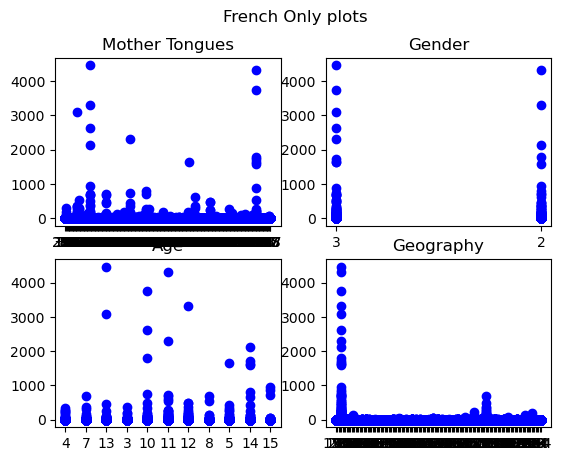

In [74]:

fig, axs = plt.subplots(2,2)
fig.suptitle('French Only plots')

axs[0,0].scatter(X_test['Mother Tongue'],Y_FrOnly_test,color = "blue")
axs[0,0].set_title('Mother Tongues')

axs[1,0].scatter(X_test['Age'],Y_FrOnly_test, color="blue")
axs[1,0].set_title('Age')

axs[0,1].scatter(X_test['Gender'],Y_FrOnly_test, color="blue")
axs[0,1].set_title('Gender')

axs[1,1].scatter(X_test['Geography'],Y_FrOnly_test, color="blue")
axs[1,1].set_title('Geography')
plt.show()


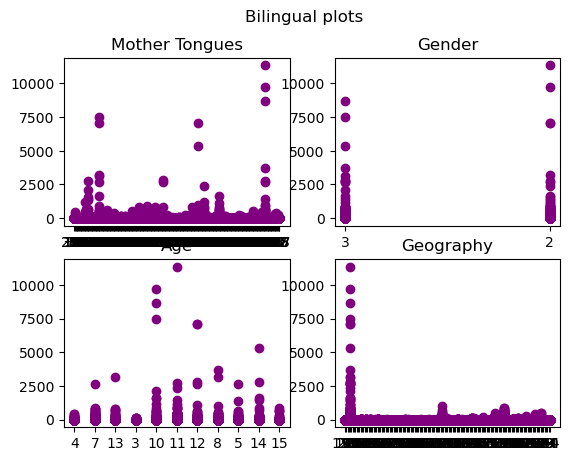

In [75]:
fig, axs = plt.subplots(2,2)
fig.suptitle('Bilingual plots')

axs[0,0].scatter(X_test['Mother Tongue'],Y_Bilang_test,color = "purple")
axs[0,0].set_title('Mother Tongues')

axs[1,0].scatter(X_test['Age'],Y_Bilang_test, color="purple")
axs[1,0].set_title('Age')

axs[0,1].scatter(X_test['Gender'],Y_Bilang_test, color="purple")
axs[0,1].set_title('Gender')

axs[1,1].scatter(X_test['Geography'],Y_Bilang_test, color="purple")
axs[1,1].set_title('Geography')
plt.show()


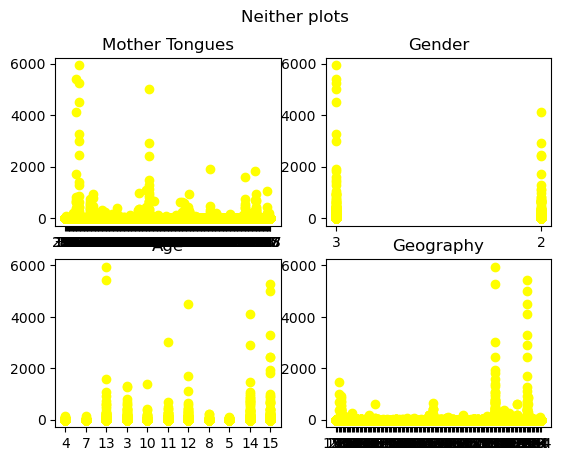

In [76]:

fig, axs = plt.subplots(2,2)
fig.suptitle('Neither plots')

axs[0,0].scatter(X_test['Mother Tongue'],Y_Neither_test,color = "yellow")
axs[0,0].set_title('Mother Tongues')

axs[1,0].scatter(X_test['Age'],Y_Neither_test, color="yellow")
axs[1,0].set_title('Age')

axs[0,1].scatter(X_test['Gender'],Y_Neither_test, color="yellow")
axs[0,1].set_title('Gender')

axs[1,1].scatter(X_test['Geography'],Y_Neither_test, color="yellow")
axs[1,1].set_title('Geography')
plt.show()


The below code provides visualization of a single tree from the Random Forests for each dependent variable. 

In [45]:
estimatorEngOnly = engOnlyRF.estimators_[5]
estimatorFrOnly = frOnlyRF.estimators_[5]
estimatorBilang = bilangRF.estimators_[5]
estimatorNeither = neitherRF.estimators_[5]

In [ ]:
'''
dot_data = export_graphviz(estimatorEngOnly, out_file=None, feature_names=X_test.columns)
graph = graphviz.Source(dot_data, format="png")
graph
'''

In [ ]:
'''
dot_data = export_graphviz(estimatorFrOnly, out_file=None, feature_names=X_test.columns)
graph = graphviz.Source(dot_data, format="png")
graph
'''

In [ ]:
dot_data = export_graphviz(estimatorBilang, out_file=None, feature_names=X_test.columns)
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
'''
predictions = [prEngOnly, prFrOnly, prBilang, prNeither]
actual = [Y_EngOnly_test, Y_FrOnly_test, Y_Bilang_test, Y_Neither_test]
for p in predictions: 
    print(p)
    '''

## Changing the train-test split

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_Categories, test_size=0.25,random_state=1234)
print(len(X_train),len(Y_train),len(X_test),len(Y_test))

678711 678711 226237 226237


In [154]:
Y_EngOnly_train = Y_train['Knowledge of official languages (5):English only[2]']
Y_EngOnly_test = Y_test['Knowledge of official languages (5):English only[2]']
Y_FrOnly_train = Y_train['Knowledge of official languages (5):French only[3]']
Y_FrOnly_test = Y_test['Knowledge of official languages (5):French only[3]']
Y_Bilang_train = Y_train['Knowledge of official languages (5):English and French[4]']
Y_Bilang_test = Y_test['Knowledge of official languages (5):English and French[4]']
Y_Neither_train = Y_train['Knowledge of official languages (5):Neither English nor French[5]']
Y_Neither_test = Y_test['Knowledge of official languages (5):Neither English nor French[5]']

In [155]:
crossValEngOnly5 = cross_validate(DecisionTreeRegressor(max_depth=8).fit(X_train,Y_EngOnly_train),X_train,Y_EngOnly_train, cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
crossValFrOnly5 = cross_validate(DecisionTreeRegressor(max_depth=8).fit(X_train,Y_FrOnly_train),X_train,Y_FrOnly_train, cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
crossValBilang5 = cross_validate(DecisionTreeRegressor(max_depth=8).fit(X_train,Y_Bilang_train),X_train,Y_Bilang_train, cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))
crossValNeither5 = cross_validate(DecisionTreeRegressor(max_depth=8).fit(X_train,Y_Neither_train),X_train,Y_Neither_train, cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','r2'))


In [ ]:
print("5 Fold Cross Validation")
print("Metrics for English Only \n\n %0.2f mean and %0.2f std R2 \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (crossValEngOnly5['test_r2'].mean(), crossValEngOnly5['test_r2'].std(), crossValEngOnly5['test_neg_mean_absolute_error'].mean(),crossValEngOnly5['test_neg_mean_absolute_error'].std(), crossValEngOnly5['test_neg_mean_squared_error'].mean(), crossValEngOnly5['test_neg_mean_squared_error'].std()))

print("\nR2 Score ", crossValEngOnly5['test_r2'])
print("Mean Absolute Error ", crossValEngOnly5['test_neg_mean_absolute_error'] )
print("Mean Squared Error " ,crossValEngOnly5['test_neg_mean_squared_error'])
print("Fit time ", crossValEngOnly5['fit_time'].mean())
print("Score time ", crossValEngOnly5['score_time'].mean())
print("\n\n")
print("Metrics for French Only \n\n %0.2f mean and %0.2f std Matthews Correlation Coefficient \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (crossValFrOnly5['test_matthews_corrcoef'].mean(),crossValFrOnly5['test_matthews_corrcoef'].std(), crossValFrOnly5['test_neg_mean_absolute_error'].mean(),crossValFrOnly5['test_neg_mean_absolute_error'].std(), crossValFrOnly5['test_neg_mean_squared_error'].mean(),crossValFrOnly5['test_neg_mean_squared_error'].std()))
print("\nMatthews Correlation ", crossValFrOnly5['test_matthews_corrcoef'])
print("Mean Absolute Error ", crossValFrOnly5['test_neg_mean_absolute_error'] )
print("Mean Squared Error" ,crossValFrOnly5['test_neg_mean_squared_error'])
print("Fit time ", crossValFrOnly5['fit_time'].mean())
print("Score time ", crossValFrOnly5['score_time'].mean())
print("\n\n")
print("Metrics for Both English and French \n\n %0.2f mean and %0.2f std Matthews Correlation Coefficient \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (crossValBilang5['test_matthews_corrcoef'].mean(),crossValBilang5['test_matthews_corrcoef'].std(), crossValBilang5['test_neg_mean_absolute_error'].mean(),crossValBilang5['test_neg_mean_absolute_error'].std(), crossValBilang5['test_neg_mean_squared_error'].mean(), crossValBilang5['test_neg_mean_squared_error'].std()))
print("\nMatthews Correlation ", crossValBilang5['test_matthews_corrcoef'])
print("Mean Absolute Error ", crossValBilang5['test_neg_mean_absolute_error'] )
print("Mean Squared Error" ,crossValBilang5['test_neg_mean_squared_error'])
print("Fit time ", crossValBilang5['fit_time'].mean())
print("Score time ", crossValBilang5['score_time'].mean())
print("\n\n")
print("Metrics for Neither English nor French \n\n %0.2f mean and %0.2f std Matthews Correlation Coefficient \n %0.2f mean and %0.2f std Mean Absolute Error \n %0.2f mean and %0.2f std Mean Squared Error" 
      % (crossValNeither5['test_matthews_corrcoef'].mean(),crossValNeither5['test_matthews_corrcoef'].std(), crossValNeither5['test_neg_mean_absolute_error'].mean(),crossValNeither5['test_neg_mean_absolute_error'].std(), crossValNeither5['test_neg_mean_squared_error'].mean(),crossValNeither5['test_neg_mean_squared_error'].std()))
print("\nMatthews Correlation ", crossValNeither5['test_matthews_corrcoef'])
print("Mean Absolute Error ", crossValNeither5['test_neg_mean_absolute_error'] )
print("Mean Squared Error" ,crossValNeither5['test_neg_mean_squared_error'])
print("Fit time ", crossValNeither5['fit_time'].mean())
print("Score time ", crossValNeither5['score_time'].mean())

In [159]:
ttestEngR2 = ttest_ind(crossValEngOnly5['test_r2'], EngOnlyDT10['test_r2'])
ttestEngAbs = ttest_ind(crossValEngOnly5['test_neg_mean_absolute_error'], EngOnlyDT10['test_neg_mean_absolute_error'])
ttestEngSquare = ttest_ind(crossValEngOnly5['test_neg_mean_squared_error'],EngOnlyDT10['test_neg_mean_squared_error'])
print(ttestEngR2, '\n',ttestEngAbs,'\n',ttestEngSquare, '\n\n')


ttestFrR2 = ttest_ind(crossValFrOnly5['test_r2'], FrOnlyDT10['test_r2'])
ttestFrAbs = ttest_ind(crossValFrOnly5['test_neg_mean_absolute_error'], FrOnlyDT10['test_neg_mean_absolute_error'])
ttestFrSquare = ttest_ind(crossValFrOnly5['test_neg_mean_squared_error'],FrOnlyDT10['test_neg_mean_squared_error'])
print(ttestFrR2, '\n',ttestFrAbs,'\n',ttestFrSquare, '\n\n')

ttestBiR2 = ttest_ind(crossValBilang5['test_r2'], BilangDT10['test_r2'])
ttestBiAbs = ttest_ind(crossValBilang5['test_neg_mean_absolute_error'], BilangDT10['test_neg_mean_absolute_error'])
ttestBiSquare = ttest_ind(crossValBilang5['test_neg_mean_squared_error'],BilangDT10['test_neg_mean_squared_error'])
print(ttestBiR2, '\n',ttestBiAbs,'\n',ttestBiSquare,'\n\n')

ttestNeiR2 = ttest_ind(crossValNeither5['test_r2'], NeitherDT10['test_r2'])
ttestNeiAbs = ttest_ind(crossValNeither5['test_neg_mean_absolute_error'], NeitherDT10['test_neg_mean_absolute_error'])
ttestNeiSquare = ttest_ind(crossValNeither5['test_neg_mean_squared_error'],NeitherDT10['test_neg_mean_squared_error'])
print(ttestNeiR2, '\n',ttestNeiAbs,'\n',ttestNeiSquare)

Ttest_indResult(statistic=-2.9510181310645796, pvalue=0.011249823404956184) 
 Ttest_indResult(statistic=-2.661551141046783, pvalue=0.019576687652096393) 
 Ttest_indResult(statistic=-0.71416464647489, pvalue=0.48775101377975005) 


Ttest_indResult(statistic=0.6879657595511991, pvalue=0.5035655841575943) 
 Ttest_indResult(statistic=0.45993329525639026, pvalue=0.6531618522267485) 
 Ttest_indResult(statistic=-0.39275531728350854, pvalue=0.7008645828893096) 


Ttest_indResult(statistic=0.7483140123534684, pvalue=0.4675937488540034) 
 Ttest_indResult(statistic=-1.0764341585142787, pvalue=0.30130445958702184) 
 Ttest_indResult(statistic=-0.5705180958977091, pvalue=0.57805476113801) 


Ttest_indResult(statistic=-1.1191478832910704, pvalue=0.28332985952115175) 
 Ttest_indResult(statistic=0.1520734328719089, pvalue=0.8814637956262115) 
 Ttest_indResult(statistic=0.08514196659597165, pvalue=0.933445807968092)


The Matthews Correlation Coefficient (MCC) is stable under a different training set. The range for the MCC is [-1,1] and the values of 0.09 to 0.25 are all weak relationships. This is noticeably a stronger relationship for French Only and for the Bilingual outputs, but still a weakly positive relationship. 

Both the Mean Absolute Error (MAE) and the Mean Squared Error (MSE) have the range (infinity,0] in the above tests, with the higher values closer to 0 indicating better prediction as the errors are smaller closer to 0. However, while the Mean Absolute Error represents the average size of the errors without considering the direction, the Mean Squared Error takes into account which direction the errors occurred in. The MSE gives high weight to large errors. In the metrics given above, while the MAE is relatively small, the MSE is large. This indicates that there is a great variance in the errors of the test set. 



14.2 s ± 248 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [ ]:
engOnlyRF = RandomForestRegressor()

In [ ]:
engOnlyRF.fit(X_train, Y_EngOnly_train)

In [ ]:
prEngOnlyRF = engOnlyRF.predict(X_test)

In [ ]:
print("Mean Absolute Error", mean_absolute_error(Y_EngOnly_test,prEngOnlyRF).mean(), mean_absolute_error(Y_EngOnly_test,prEngOnlyRF).std())
print("Mean Squared Error", mean_squared_error(Y_EngOnly_test,prEngOnlyRF).mean(),mean_squared_error(Y_EngOnly_test,prEngOnlyRF).std())

